# Graphics
## Exercises

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
mpl.style.use('seaborn')

1. Download data for the past 20 years for the S&P 500 from Yahoo!. Plot the price against dates, and ensure the date display is reasonable.

In [2]:
#snp_data = pd.read_csv('SNP_20.csv', index_col="Date", parse_dates=True)
snp_data = pd.read_csv('SNP_20.csv')
snp_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-08,1298.349976,1298.349976,1276.290039,1295.859985,1295.859985,1115500000
1,2001-01-09,1295.859985,1311.719971,1295.140015,1300.800049,1300.800049,1191300000
2,2001-01-10,1300.800049,1313.760010,1287.280029,1313.270020,1313.270020,1296500000
3,2001-01-11,1313.270020,1332.189941,1309.719971,1326.819946,1326.819946,1411200000
4,2001-01-12,1326.819946,1333.209961,1311.589966,1318.550049,1318.550049,1276000000
...,...,...,...,...,...,...,...
5025,2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3387030000
5026,2020-12-30,3736.189941,3744.629883,3730.209961,3732.040039,3732.040039,3145200000
5027,2020-12-31,3733.270020,3760.199951,3726.879883,3756.070068,3756.070068,3172510000
5028,2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5006680000


In [10]:
snp_data.loc[:, 'Open':'Volume']

,Open,High,Low,Close,Adj Close,Volume
0,1298.349976,1298.349976,1276.290039,1295.859985,1295.859985,1115500000
1,1295.859985,1311.719971,1295.140015,1300.800049,1300.800049,1191300000
2,1300.800049,1313.760010,1287.280029,1313.270020,1313.270020,1296500000
3,1313.270020,1332.189941,1309.719971,1326.819946,1326.819946,1411200000
4,1326.819946,1333.209961,1311.589966,1318.550049,1318.550049,1276000000
...,...,...,...,...,...,...
5025,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3387030000
5026,3736.189941,3744.629883,3730.209961,3732.040039,3732.040039,3145200000
5027,3733.270020,3760.199951,3726.879883,3756.070068,3756.070068,3172510000
5028,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5006680000


In [11]:
snp_data.columns[1:-1]

Index(['Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')

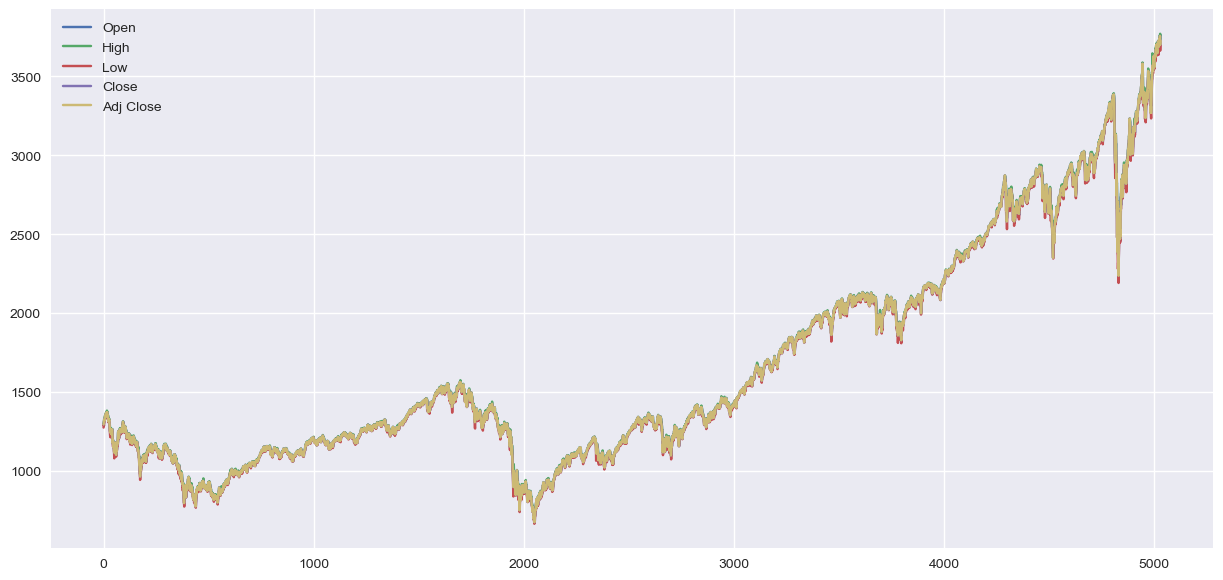

In [9]:
# Correct plot, but incorrect x-axis:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.plot(snp_data.loc[:, 'Open':'Adj Close'])
ax.legend(snp_data.columns[1:-1])
plt.show()

In [13]:
snp_data['Date'][0]

'2001-01-08'

In [14]:
# Translating dates in datetime format:
x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in snp_data['Date']]

In [15]:
x_values

[datetime.date(2001, 1, 8),
 datetime.date(2001, 1, 9),
 datetime.date(2001, 1, 10),
 datetime.date(2001, 1, 11),
 datetime.date(2001, 1, 12),
 datetime.date(2001, 1, 16),
 datetime.date(2001, 1, 17),
 datetime.date(2001, 1, 18),
 datetime.date(2001, 1, 19),
 datetime.date(2001, 1, 22),
 datetime.date(2001, 1, 23),
 datetime.date(2001, 1, 24),
 datetime.date(2001, 1, 25),
 datetime.date(2001, 1, 26),
 datetime.date(2001, 1, 29),
 datetime.date(2001, 1, 30),
 datetime.date(2001, 1, 31),
 datetime.date(2001, 2, 1),
 datetime.date(2001, 2, 2),
 datetime.date(2001, 2, 5),
 datetime.date(2001, 2, 6),
 datetime.date(2001, 2, 7),
 datetime.date(2001, 2, 8),
 datetime.date(2001, 2, 9),
 datetime.date(2001, 2, 12),
 datetime.date(2001, 2, 13),
 datetime.date(2001, 2, 14),
 datetime.date(2001, 2, 15),
 datetime.date(2001, 2, 16),
 datetime.date(2001, 2, 20),
 datetime.date(2001, 2, 21),
 datetime.date(2001, 2, 22),
 datetime.date(2001, 2, 23),
 datetime.date(2001, 2, 26),
 datetime.date(2001, 2,

In [16]:
# Another way using pandas:
x_values_1 = pd.to_datetime(snp_data['Date'])

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
for col in snp_data.columns[1:-1]:
    #plt.plot(range(nb_points), snp_data[col], '.')
    plt.plot(x_values, snp_data[col], '.', markersize=4)
ax.legend(snp_data.columns[1:-1])
# Extracting years:
years = mpl.dates.YearLocator()
# Setting the x-axis:
ax.xaxis.set_major_locator(years)
# Formatting the x-axis:
fmt = mpl.dates.DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(fmt)
fig.autofmt_xdate()
plt.tight_layout()
plt.draw()

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
for col in snp_data.columns[1:-1]:
    #plt.plot(range(nb_points), snp_data[col], '.')
    plt.plot(x_values, snp_data[col], '.', markersize=4)
ax.legend(snp_data.columns[1:-1])
# Extracting years:
years = mpl.dates.YearLocator()
# Setting the x-axis:
ax.xaxis.set_major_locator(years)
# Formatting the x-axis:
fmt = mpl.dates.DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(fmt)
fig.autofmt_xdate()
plt.tight_layout()
plt.draw()

In [19]:
snp_data['Date']

0       2001-01-08
1       2001-01-09
2       2001-01-10
3       2001-01-11
4       2001-01-12
           ...    
5025    2020-12-29
5026    2020-12-30
5027    2020-12-31
5028    2021-01-04
5029    2021-01-05
Name: Date, Length: 5030, dtype: object